In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()




In [ ]:
model.fit(train_images, train_labels, epochs=5000 )

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2381 - accuracy: 0.9421
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0691 - accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0655 - accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0628 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0608 - accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0622 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0630 - accuracy: 0.9809
Epoch 8/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0695 - accuracy: 0.9787
Epoch 9/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0746 - accuracy: 0.9768
Epoch 10/10
 337/1875 [====>.........................] - ETA: 40

KeyboardInterrupt: 

In [ ]:
import numpy as np
pre_label = np.argmax(model.predict(test_images), axis = 1)

313/313 [==============================] - 4s 11ms/step


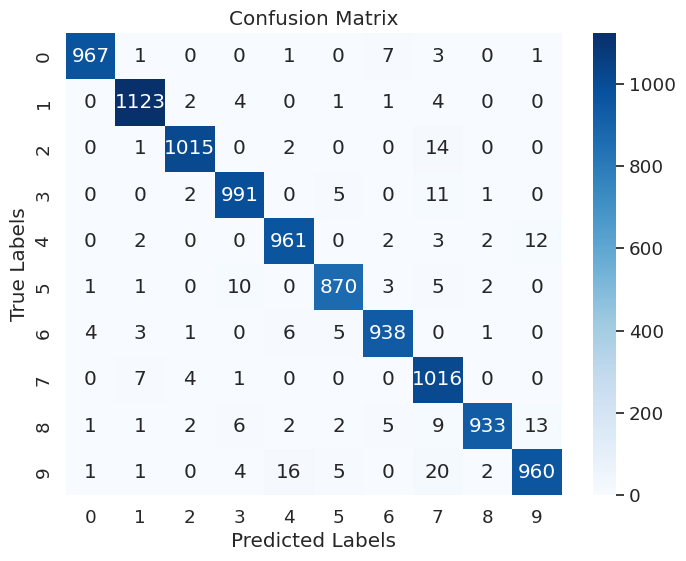

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have your true labels and predicted labels


# Generate the confusion matrix
cm = confusion_matrix(test_labels, pre_label)

# Define labels for the confusion matrix
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Your class labels

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the trained model
# model = tf.keras.models.load_model('path_to_your_trained_model')

# Load and preprocess the image
image_path = '7.png'
image = Image.open(image_path)
image = image.resize((28, 28))  # Resize to match model's input shape
image_array = np.array(image.convert('L'))  # Convert to grayscale and normalize pixel values
image_array = 255 - image_array
image_array = image_array.reshape((28, 28, 1))   # Reshape and normalize pixel values
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 138ms/step
Predicted class: 7


In [ ]:
from matplotlib import pyplot as plt

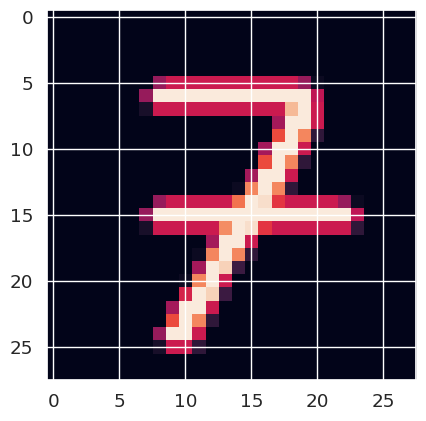

In [ ]:
plt.imshow(image_array[0])